TP fais par : Leo Pellandini, Steven Jaquet et André Quintas Gervasio

# PW4 - Linear Regression

## Imports

In [13]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [14]:
datafile = "lausanne-appart.csv"

Read the data

In [15]:
dataset = pd.read_csv(datafile)

Display first rows

In [16]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

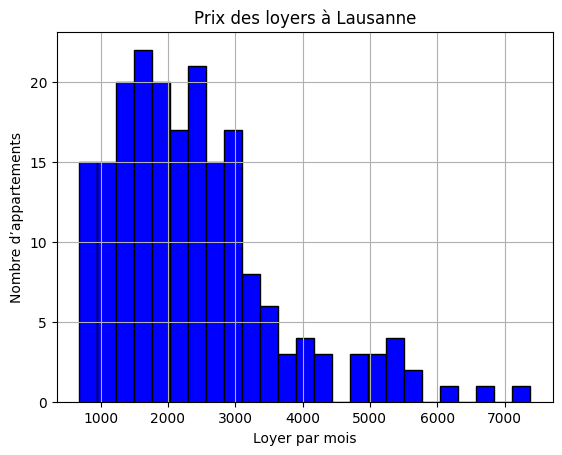

In [17]:
# Your code here
dataset["rent_price"].hist(bins=25, color="blue", edgecolor = 'black',)

plt.title("Prix des loyers à Lausanne")
plt.xlabel("Loyer par mois")
plt.ylabel("Nombre d’appartements")
plt.show()

b) Plot a histogram to visualize the distribution of the living area

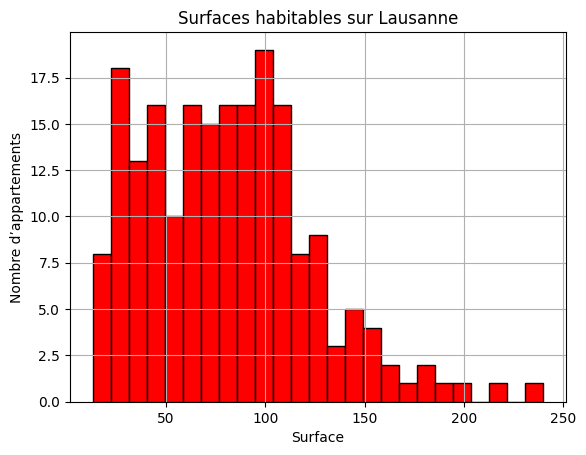

In [ ]:
# Your code here
dataset["living_area"].hist(bins=25, color="red", edgecolor="black")

plt.title("Surfaces habitables sur Lausanne")
plt.xlabel("Surface")
plt.ylabel("Nombre d’appartements")
plt.show()

c) Plot a scatter plot of renting price as a function of living area

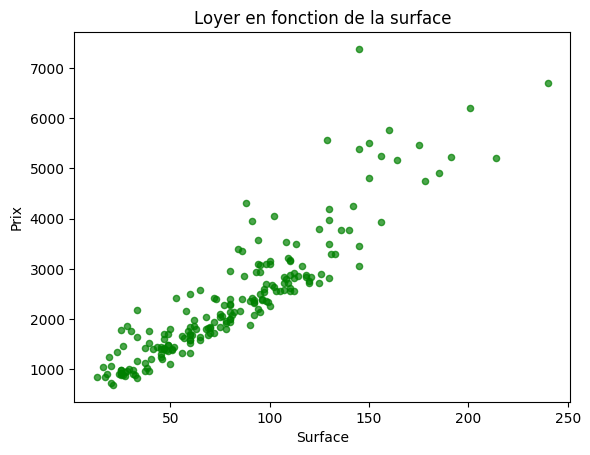

In [19]:
# Your code here
dataset.plot.scatter(x="living_area",y="rent_price", color="green", alpha=0.7)

plt.title("Loyer en fonction de la surface")
plt.xlabel("Surface")
plt.ylabel("Prix")
plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

n_x=201, n_y=201
Intercept : 240.07710726596278
Pente : 26.332424571995677


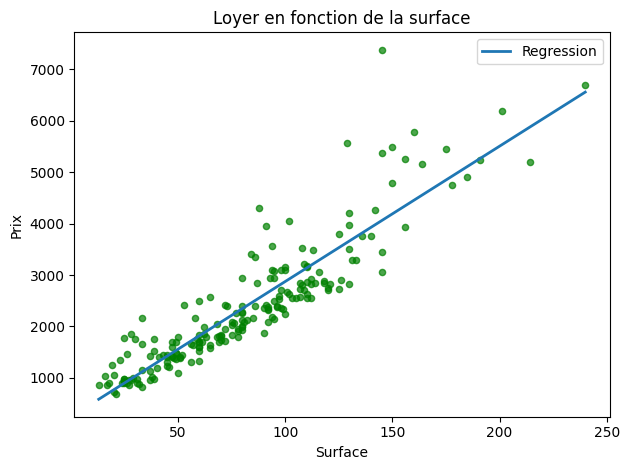

In [20]:
# Your code here


x = dataset["living_area"].to_numpy(dtype=float)
y = dataset["rent_price"].to_numpy(dtype=float)
print(f"n_x={x.size}, n_y={y.size}")

X = np.c_[np.ones_like(x), x] #construire matrice

# theta = (X^T X)^(-1) X^T y
XT_X = X.T @ X  
XT_y = X.T @ y     
theta = np.linalg.solve(XT_X, XT_y) 
intercept = theta[0] # terme constant
slope = theta[1] # pente 

print("Intercept :", intercept)
print("Pente :", slope)

# plot scatter et tracer la ligne de regression
ax = dataset.plot.scatter(x="living_area", y="rent_price", color="green", alpha=0.7)
ax.set_title("Loyer en fonction de la surface")
ax.set_xlabel("Surface")
ax.set_ylabel("Prix")
xs = np.linspace(x.min(), x.max(), 200)
ys = intercept + slope * xs
ax.plot(xs, ys, linewidth=2, label="Regression")

ax.legend()
plt.tight_layout()
plt.show()


b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [21]:
# hθ(x) - fonction
def predict(x, intercept, slope):
    return intercept + slope * x

# prédire :
y_pred = predict(x, intercept, slope)

# nb d'exemples
N = len(y)

# calcule du coût
# J(θ) = 1/(2N) * Somme(hθ(x) - y)^2
cost = (1 / (2 * N)) * np.sum((y_pred - y) ** 2)

print(f"Cost J(theta) = {cost}")

Cost J(theta) = 138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [38]:
# Your code here
#predict(...) fait plus haut

def cost(x, y, theta0, theta1):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y
    return 0.5 * np.mean(err ** 2)

#    grad_θ0 = (1/N) * Somme(hθ(x) - y)
#    grad_θ1 = (1/N) * Somme(hθ(x) - y) * x
def full_batch_step(x, y, theta0, theta1, alpha):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y

    grad_theta0 = np.mean(err)
    grad_theta1 = np.mean(err * x)

    theta0 = theta0 - alpha * grad_theta0
    theta1 = theta1 - alpha * grad_theta1
    return theta0, theta1

# boucle gradient descent
def gradient_descent(x, y, epochs=500, alpha=0.000001):
    theta0, theta1 = 0.0, 0.0
    perte = []

    for epoch in range(epochs):
        theta0, theta1 = full_batch_step(x, y, theta0, theta1, alpha)
        j = cost(x, y, theta0, theta1)
        perte.append(j)
        print(f"epoch {epoch+1}/{epochs} - cost: {j} - theta0={theta0}, theta1={theta1}")

    return theta0, theta1, perte

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

epoch 1/500 - cost: 3527645.4775350015 - theta0=0.0023782437810945275, theta1=0.24012633333333333
epoch 2/500 - cost: 3471179.1239961954 - theta0=0.004736987164610282, theta1=0.4782405195201903
epoch 3/500 - cost: 3415655.1272361227 - theta0=0.007076393554393819, theta1=0.7143594193843473
epoch 4/500 - cost: 3361057.7604319253 - theta0=0.009396624985046176, theta1=0.9484997524639998
epoch 5/500 - cost: 3307371.5592228672 - theta0=0.01169784213339649, theta1=1.1806780981956673
epoch 6/500 - cost: 3254581.3173301443 - theta0=0.013980204329879474, theta1=1.4109108970881785
epoch 7/500 - cost: 3202672.082249809 - theta0=0.016243869569817552, theta1=1.639214451886818
epoch 8/500 - cost: 3151629.151017564 - theta0=0.018488994524608456, theta1=1.8656049287277177
epoch 9/500 - cost: 3101438.066044236 - theta0=0.020715734552819078, theta1=2.090098358282577
epoch 10/500 - cost: 3052084.611020763 - theta0=0.022924243711186367, theta1=2.3127106368937898
epoch 11/500 - cost: 3003554.8068915056 - th

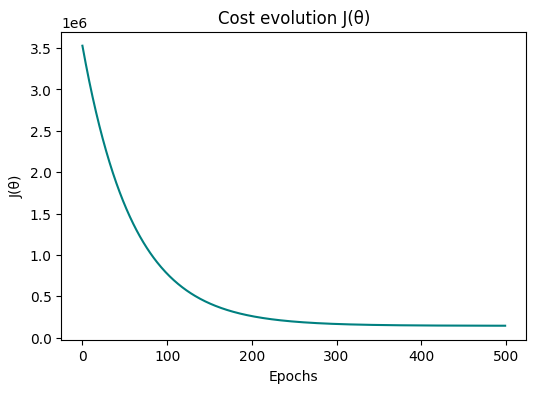

In [39]:
# Your code here
theta0, theta1, losses = gradient_descent(living_area, rent_price, epochs=500, alpha=0.000001)

plt.figure(figsize=(6,4))
plt.plot(range(len(losses)), losses, color="teal")
plt.title("Cost evolution J(θ)")
plt.xlabel("Epochs")
plt.ylabel("J(θ)")
plt.show()

On voit que le cout diminue après les itérations et qu'il converge vers une solution optimale.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

On peut stoper la descente de gradient quand on a atteint un nombre maximum d’itérations prévu au départ.
Sinon on peut aussi s’arrêter plus tôt si le coût global ne change presque plus entre deux étapes.
Un autre signe d’arrêt est quand le gradient devient très petit, ce qui veut dire que les paramètres bougent à peine et que l’algorithme n’apprend plus vraiment.
Aussi si on suit l’erreur sur un jeu de validation et qu’elle commence à augmenter ou ne s’améliore plus, on peut stopper pour éviter l'overfitting.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [50]:

# --- valeurs x régulières pour tracer une droite propre
x_line = np.linspace(dataset["living_area"].min(),
                     dataset["living_area"].max(),
                     300)

# --- prédictions du modèle
y_line_normal = theta0 + theta1 * x_line          # droite équation normale
y_line_grad   = gtheta0 + gtheta1 * x_line        # droite gradient descent (optionnelle)

# --- scatter des données réelles
plt.figure(figsize=(7,4))
plt.scatter(dataset["living_area"], dataset["rent_price"],
            color="green", alpha=0.6, label="Données réelles")

# --- droites de régression
plt.plot(x_line, y_line_normal, color="red", linewidth=2,
         label="hθ(x) - équation normale")
plt.plot(x_line, y_line_grad, color="blue", linestyle="--", linewidth=2,
         label="hθ(x) - gradient descent")

# --- habillage du graphique
plt.title("Loyer en fonction de la surface habitable")
plt.xlabel("Surface habitable (m²)")
plt.ylabel("Prix du loyer (CHF)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'gtheta0' is not defined

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [41]:
# Your code here

_Your answer here_

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [26]:
# Your code here

a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [27]:
# Your code here

b) How many samples do you need to visit for reaching the convergence?

_Your answer here_

c) What kind of stopping criterion could we use here?

_Your answer here_

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [28]:
# Your code here

_Your answer here_

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

_Your answer here_

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

_Your answer here_

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

_Your answer here_

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

_Your answer here_

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_